![](https://prachimjoshi.files.wordpress.com/2015/07/screen_shot_2010-12-03_at_5-46-21_pm.png)

In [1]:
!pip install seaborn==0.11.0
import pandas as pd
import csv as csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

np.random.seed(24568)

     |████████████████████████████████| 283 kB 196 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


# Loading The Dataset

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df  = pd.read_csv("../input/titanic/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Looks like we have several data feature missing in both of the training data and testing dataset. We will take care of them in the later section of the notebook. But before that we will remove some of the unnecessary features from the train and test dataset. 

In [5]:
#drop un-insightful columns
train_df = train_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_df  = test_df.drop(['Name','Ticket','Cabin'], axis=1)

### Replacing the Categorical Feature with Binary Number

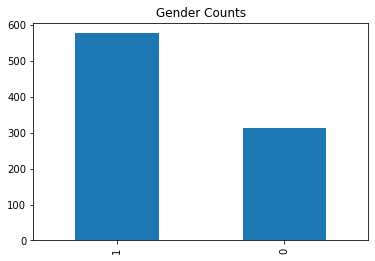

In [6]:
#feature by feature analysis
#Gender: replace male/female with integers
mapping = {'male':1,'female':0}
train_df['Gender'] = train_df['Sex'].map(mapping).astype(int)
test_df['Gender'] = test_df['Sex'].map(mapping).astype(int)
train_df = train_df.drop(['Sex'], axis=1)    
test_df = test_df.drop(['Sex'], axis=1)
train_df['Gender'].value_counts().plot.bar(title = 'Gender Counts' )

## Taking Care of Missing Values and Categorical Values 

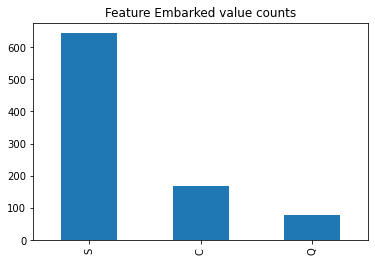

In [7]:
#Embarked: fill na and replace C/Q/S with integers
mapping = {'C':0,'Q':1,'S':2}
train_df['Embarked'].value_counts().plot.bar(title  = 'Feature Embarked value counts')
train_df['Embarked'] = train_df['Embarked'].fillna("S")
test_df['Embarked'] = test_df['Embarked'].fillna("S")

train_df['Embark'] = train_df['Embarked'].map(mapping).astype(int)
test_df['Embark'] = test_df['Embarked'].map(mapping).astype(int)
train_df = train_df.drop(['Embarked'], axis=1)    
test_df = test_df.drop(['Embarked'], axis=1)  

In [8]:
#Age: fill na with medium age
median_age = train_df['Age'].dropna().median()
train_df['Age'] = train_df['Age'].fillna(median_age)
test_df['Age'] = test_df['Age'].fillna(median_age)

In [9]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embark
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,28.0,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


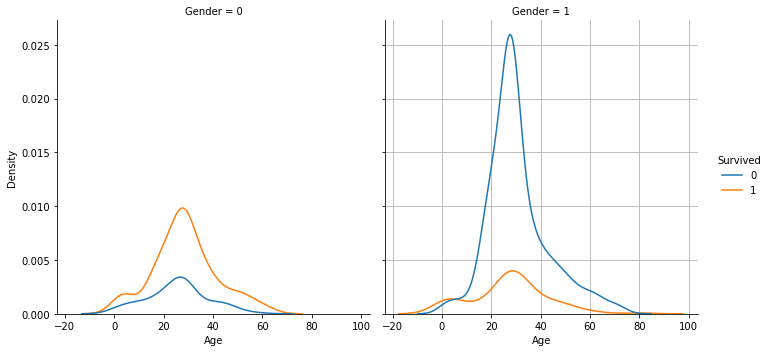

In [10]:
# sns.distplot(train_df, x="Age", hue="Survived", multiple="stack")
sns.displot(data=train_df, x="Age", hue="Survived", col="Gender", kind="kde")
plt.grid()

In [11]:
#Fare: fill na with medium fare
median_fare = train_df['Fare'].dropna().median()
test_df['Fare'] = test_df['Fare'].fillna(median_fare)

## Pandas to Numpy

In [12]:
#machine learning
train_data = train_df.values
test_data = test_df.values
    
X_train = train_data[:,1:]
y_train = train_data[:,0]
    
X_test = test_data[:,1:]
idx = test_data[:,0].astype(np.int32)

In [13]:
#random forest classifier
rfc = RandomForestClassifier(n_estimators=100)  
rfc.fit(X_train, y_train)
score_rfc = rfc.score(X_train, y_train)
out_rfc = rfc.predict(X_test)
print(f'random forest classifier score: {score_rfc}')

random forest classifier score: 0.9797979797979798


In [14]:
#logistic regression
logreg = LogisticRegression(max_iter = 300)
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_train, y_train)
out_logreg = logreg.predict(X_test)
print(f'logistic regression score: {score_logreg}')

logistic regression score: 0.8002244668911336


In [15]:
#SVM
svc = SVC()
svc.fit(X_train, y_train)
score_svc = svc.score(X_train, y_train)
out_svc = svc.predict(X_test)    
print(f'SVM score: {score_svc}')    

SVM score: 0.6846240179573513


In [16]:
#knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
score_knn = knn.score(X_train, y_train)
out_knn = knn.predict(X_test)
print(f'knn score: {score_knn}')  

knn score: 0.8092031425364759


In [17]:
#voting classifier    
vclf = VotingClassifier(estimators=[('rf',rfc),('lr',logreg),('svm',svc),('knn',knn)], voting='hard', weights=[2,1,2,1])
vclf.fit(X_train, y_train)
out_vclf = vclf.predict(X_test)

In [18]:
sub = pd.DataFrame({'PassengerId': test_df['PassengerId'].values, 'Survived':out_rfc.astype('int') })
sub.to_csv('submission.csv', index = False)
sub.head(100)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
95,987,0
96,988,1
97,989,0
98,990,0
